<a href="https://colab.research.google.com/github/srinathchowdary11/Advanced-Machine-Learning/blob/main/Assignment1/AML_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ** Enhancing Neural Network Performance on the IMDb Dataset**

**Abstract:**
This project is dedicated to investigating diverse methods for enhancing the efficacy of a neural network model when applied to the IMDb dataset. We aim to refine an existing neural network model and contrast the outcomes of various strategies, including adjustments to the number of hidden layers, units, loss function, activation function, and the integration of regularization techniques such as dropout.

**Dataset:**
The IMDb dataset, comprising movie reviews tagged as positive or negative, was utilized for this study. With 25,000 movie reviews designated for training and an additional 25,000 for testing, the dataset served as a robust foundation for our experiments.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [83]:
from numpy.random import seed
seed(151)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [84]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [85]:
train_labels[0]

1

In [86]:
len(train_labels)

25000

In [87]:
len(train_labels)

25000

In [88]:
test_data

array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [89]:
test_labels[0]

0

In [90]:
max([max(sequence) for sequence in test_data])

9999

**Deciphering Textual Reviews**

In [91]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 2, "?") for i in train_data[0]])

In [92]:
decoded_review

"? that on as about parts admit ready speaking really care boot see holy and again who each a are any about brought life what power ? br they sound everything a though and part life look ? fan recommend like and part elegant successful for feeling from this based and take what as of those core movie that on and manage airplane 4 and on me because i as about parts from been was this military and on for kill for i as cinematography with ? a which let i is left is two a and seat raises as sound see worried by and still i as from running a are off good who scene some are church by of on i come he bad more a that gives as into ? is and films best commenting was each and ? to rid a beyond who me about parts final his keep special has to and ? manages this characters how and perhaps was american too at references no his something of enough russ with and bit on film say final his sound a back one jews with good who he there's made are characters and bit really as from harry how i as actor a as

**Data preparation**

In [93]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 2.
    return results

**Data Vectorization**

In [94]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [95]:
x_train[0]

array([0., 2., 2., ..., 0., 0., 0.])

In [96]:
x_test[0]

array([0., 2., 2., ..., 0., 0., 0.])

**Label Vectorization**

In [97]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**Constructing a model utilizing the rectified linear unit (ReLU) and then compiling it.**

In [98]:
from tensorflow import keras
from tensorflow.keras import layers
seed(151)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [99]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [100]:
seed(151)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [101]:
seed(151)
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

hist_dict = history.history
hist_dict.keys()

Epoch 1/20
29/29 [==============================] - 2s 33ms/step - loss: 0.5034 - accuracy: 0.7654 - val_loss: 0.3910 - val_accuracy: 0.8471
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2972 - accuracy: 0.8969 - val_loss: 0.2967 - val_accuracy: 0.8865
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2236 - accuracy: 0.9252 - val_loss: 0.2781 - val_accuracy: 0.8899
Epoch 4/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1779 - accuracy: 0.9397 - val_loss: 0.2846 - val_accuracy: 0.8843
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1492 - accuracy: 0.9521 - val_loss: 0.3078 - val_accuracy: 0.8805
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1249 - accuracy: 0.9591 - val_loss: 0.3343 - val_accuracy: 0.8747
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1007 - accuracy: 0.9702 - val_loss: 0.3225 - val_accuracy: 0.8829
Epoch 8/20
29/29 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

1. The training began with a loss of 0.5034 and an accuracy of 0.7654 on the
training set, and a validation loss of 0.1504 with a validation accuracy of 0.8471.
2. As the training progressed, the model's performance on the training set continued to improve, reaching a loss of 0.0155 and an accuracy of 0.9959 by the 20th epoch. However, on the validation set, the model achieved a loss of 0.5775 and an accuracy of 0.8723, indicating signs of overfitting to the training data.

**Plotting the training and validation loss**

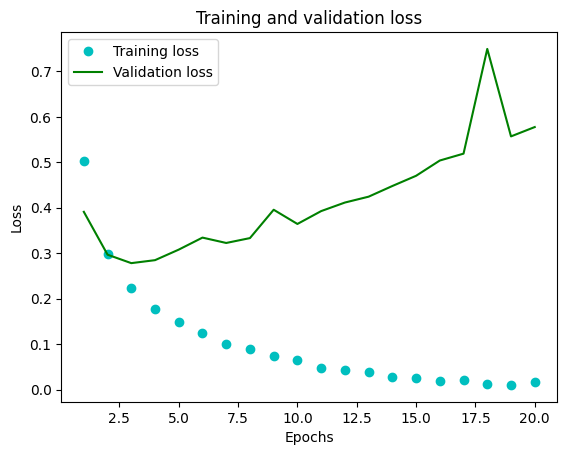

In [102]:
import matplotlib.pyplot as plt
hist_dict = history.history
loss_values = hist_dict["loss"]
val_loss_values = hist_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "co", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

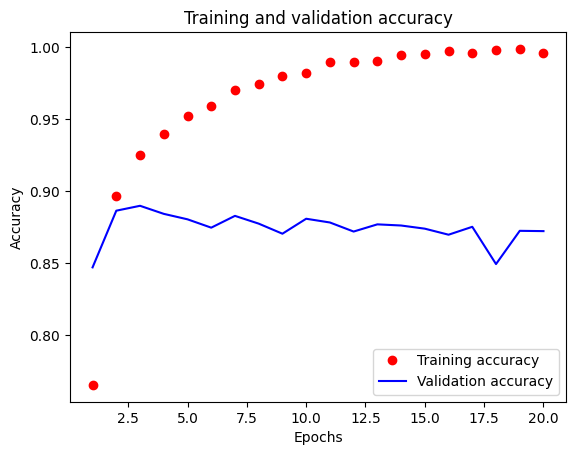

In [103]:
plt.clf()
acc = hist_dict["accuracy"]
val_acc = hist_dict["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

* The visual representations indicate that the model's ability to accurately
predict new data diminishes after a certain number of epochs, indicating overfitting to the training data. It may be beneficial to conduct additional analysis, such as modifying the model's hyperparameters or implementing regularization techniques, to enhance its overall performance.

**Retraining the model**

In [104]:
np.random.seed(151)
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=525)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
48/48 [==============================] - 1s 6ms/step - loss: 0.4582 - accuracy: 0.8061
Epoch 2/4
48/48 [==============================] - 0s 5ms/step - loss: 0.2557 - accuracy: 0.9093
Epoch 3/4
48/48 [==============================] - 0s 6ms/step - loss: 0.1992 - accuracy: 0.9266
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3663 - accuracy: 0.8534


[0.36632782220840454, 0.85343998670578]

* The neural network model has obtained an 85.34% accuracy on the test dataset, with a corresponding loss value of 0.3663.

In [105]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.13846359],
       [0.99989885],
       [0.5332834 ],
       ...,
       [0.09695407],
       [0.05167303],
       [0.448192  ]], dtype=float32)

**Building a neural network with 1 hidden layer**

In [106]:
seed(151)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 1s 32ms/step - loss: 0.4822 - accuracy: 0.7842 - val_loss: 0.3757 - val_accuracy: 0.8570
Epoch 2/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2913 - accuracy: 0.9026 - val_loss: 0.3032 - val_accuracy: 0.8855
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2274 - accuracy: 0.9238 - val_loss: 0.3562 - val_accuracy: 0.8508
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1884 - accuracy: 0.9379 - val_loss: 0.2823 - val_accuracy: 0.8855
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1588 - accuracy: 0.9509 - val_loss: 0.2876 - val_accuracy: 0.8855
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1423 - accuracy: 0.9547 - val_loss: 0.2831 - val_accuracy: 0.8857
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1208 - accuracy: 0.9655 - val_loss: 0.3050 - val_accuracy: 0.8774
Epoch 8/20
29/29 [=

In [107]:
hist_dict = history1.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

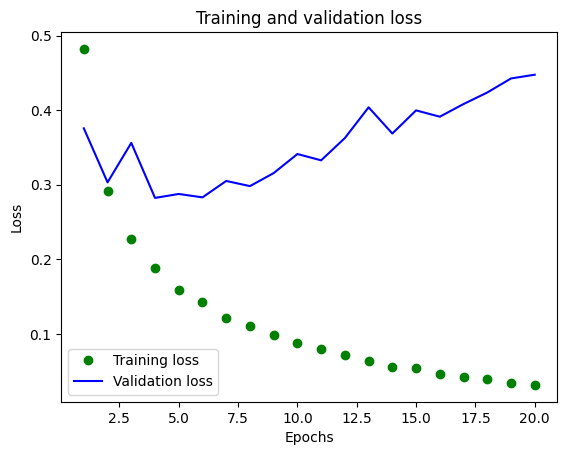

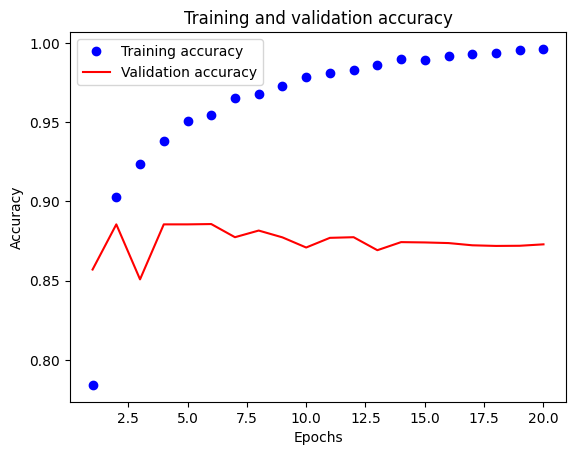

In [108]:
import matplotlib.pyplot as plt
hist_dict = history1.history
loss_values = hist_dict["loss"]
val_loss_values = hist_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
#Plotting graph between Training and Validation loss
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Plotting graph between Training and Validation Accuracy
plt.clf()
acc = hist_dict["accuracy"]
val_acc = hist_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "r", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [109]:
np.random.seed(151)
model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model1.fit(x_train, y_train, epochs=5, batch_size=525)
results1 = model1.evaluate(x_test, y_test)

Epoch 1/5
48/48 [==============================] - 1s 5ms/step - loss: 0.4264 - accuracy: 0.8143
Epoch 2/5
48/48 [==============================] - 0s 6ms/step - loss: 0.2541 - accuracy: 0.9061
Epoch 3/5
48/48 [==============================] - 0s 5ms/step - loss: 0.2002 - accuracy: 0.9291
Epoch 4/5
48/48 [==============================] - 0s 5ms/step - loss: 0.1771 - accuracy: 0.9357
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.3046 - accuracy: 0.8797


In [110]:
results1

[0.30455276370048523, 0.8797199726104736]

* The loss on the test set is 0.3045, and the accuracy is 87.97%.



In [111]:
model1.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.22547168],
       [0.9999687 ],
       [0.9002679 ],
       ...,
       [0.21891184],
       [0.07732808],
       [0.6713103 ]], dtype=float32)

**Building a neural network with 3 hidden layers**

In [112]:
np.random.seed(151)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history3 = model_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 2s 31ms/step - loss: 0.5299 - accuracy: 0.7615 - val_loss: 0.3862 - val_accuracy: 0.8673
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.3187 - accuracy: 0.8903 - val_loss: 0.3061 - val_accuracy: 0.8864
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2373 - accuracy: 0.9198 - val_loss: 0.2847 - val_accuracy: 0.8889
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1867 - accuracy: 0.9367 - val_loss: 0.2757 - val_accuracy: 0.8895
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1510 - accuracy: 0.9489 - val_loss: 0.2873 - val_accuracy: 0.8830
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1272 - accuracy: 0.9575 - val_loss: 0.3151 - val_accuracy: 0.8777
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1106 - accuracy: 0.9631 - val_loss: 0.3154 - val_accuracy: 0.8843
Epoch 8/20
29/29 [=

In [113]:
hist_dict3 = history3.history
hist_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

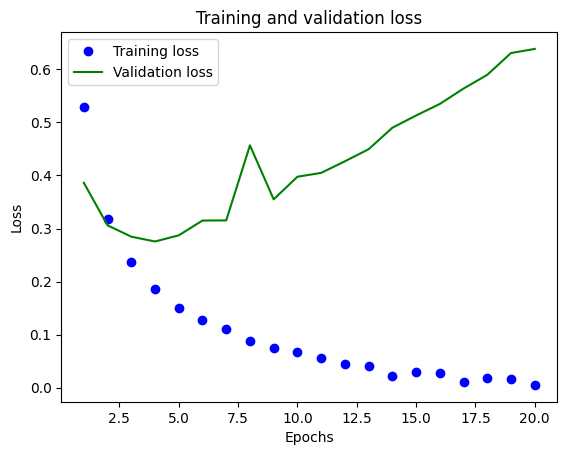

In [114]:
loss_values = hist_dict3["loss"]
val_loss_values = hist_dict3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

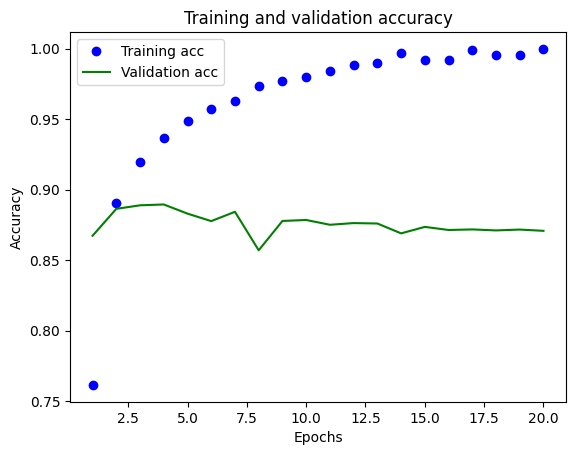

In [115]:
plt.clf()
acc = hist_dict3["accuracy"]
val_acc = hist_dict3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [116]:
np.random.seed(151)
model_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3.fit(x_train, y_train, epochs=3, batch_size=525)
results_3 = model_3.evaluate(x_test, y_test)


Epoch 1/3
48/48 [==============================] - 1s 6ms/step - loss: 0.4684 - accuracy: 0.7813
Epoch 2/3
48/48 [==============================] - 0s 6ms/step - loss: 0.2642 - accuracy: 0.9000
Epoch 3/3
782/782 [==============================] - 1s 1ms/step - loss: 0.3319 - accuracy: 0.8668


* The loss on the test set is 0.3318, and the accuracy is 86.67%.

In [117]:
results_3

[0.3318694829940796, 0.8667600154876709]

In [118]:
model_3.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.15202591],
       [0.9992959 ],
       [0.35136637],
       ...,
       [0.10837806],
       [0.05962013],
       [0.13206384]], dtype=float32)

* Changing the number of layers does not notably enhance the model's accuracy, although the three-layer model demonstrates superior accuracy compared to the others. When determining the overall structure of your neural network, the number of units in the hidden layers must be carefully selected. Despite not directly interfacing with the external environment, these layers significantly influence the final outcome.


**Building Neural Network with 32 units.**

In [119]:
np.random.seed(151)
model_32 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(123)
history32 = model_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 1s 31ms/step - loss: 0.4934 - accuracy: 0.7719 - val_loss: 0.3900 - val_accuracy: 0.8394
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2825 - accuracy: 0.8953 - val_loss: 0.3120 - val_accuracy: 0.8732
Epoch 3/20
29/29 [==============================] - 0s 10ms/step - loss: 0.2079 - accuracy: 0.9265 - val_loss: 0.3728 - val_accuracy: 0.8486
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1660 - accuracy: 0.9399 - val_loss: 0.3872 - val_accuracy: 0.8509
Epoch 5/20
29/29 [==============================] - 0s 11ms/step - loss: 0.1309 - accuracy: 0.9568 - val_loss: 0.3608 - val_accuracy: 0.8670
Epoch 6/20
29/29 [==============================] - 0s 11ms/step - loss: 0.1036 - accuracy: 0.9665 - val_loss: 0.3148 - val_accuracy: 0.8840
Epoch 7/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0850 - accuracy: 0.9740 - val_loss: 0.3412 - val_accuracy: 0.8818
Epoch 8/20
29/2

In [120]:
hist_dict32 = history32.history
hist_dict32.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

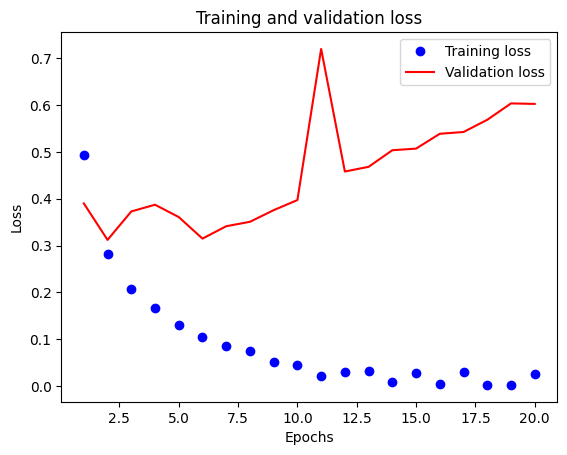

In [121]:
loss_values = hist_dict32["loss"]
val_loss_values = hist_dict32["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

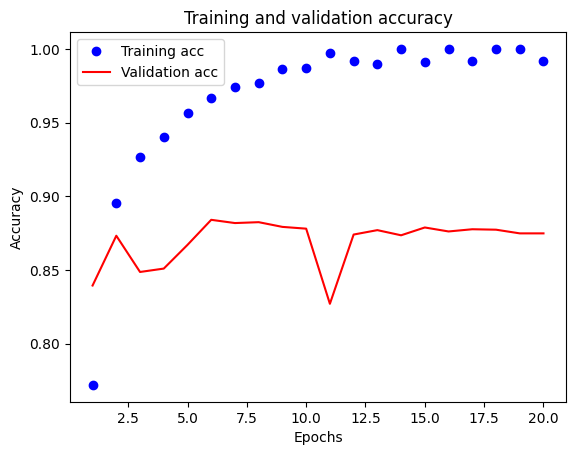

In [122]:
plt.clf()
acc = hist_dict32["accuracy"]
val_acc = hist_dict32["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [123]:
history_32 = model_32.fit(x_train, y_train, epochs=3, batch_size=525)
results_32 = model_32.evaluate(x_test, y_test)
results_32

Epoch 1/3
48/48 [==============================] - 0s 7ms/step - loss: 0.1897 - accuracy: 0.9466
Epoch 2/3
48/48 [==============================] - 0s 7ms/step - loss: 0.1004 - accuracy: 0.9692
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.8666


[0.4368942081928253, 0.8666399717330933]

In [124]:
model_32.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.02879145],
       [0.99999994],
       [0.8684288 ],
       ...,
       [0.0552201 ],
       [0.0410776 ],
       [0.9360502 ]], dtype=float32)

* The accuracy on the validation set is 86.66%

**Traing the model with 64 units**

In [125]:
np.random.seed(151)
model_64 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(151)
history64 = model_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 2s 34ms/step - loss: 0.5301 - accuracy: 0.7361 - val_loss: 0.3572 - val_accuracy: 0.8602
Epoch 2/20
29/29 [==============================] - 0s 13ms/step - loss: 0.2896 - accuracy: 0.8881 - val_loss: 0.3063 - val_accuracy: 0.8745
Epoch 3/20
29/29 [==============================] - 0s 14ms/step - loss: 0.2174 - accuracy: 0.9179 - val_loss: 0.2766 - val_accuracy: 0.8846
Epoch 4/20
29/29 [==============================] - 0s 13ms/step - loss: 0.1623 - accuracy: 0.9405 - val_loss: 0.3522 - val_accuracy: 0.8685
Epoch 5/20
29/29 [==============================] - 0s 13ms/step - loss: 0.1265 - accuracy: 0.9531 - val_loss: 0.4218 - val_accuracy: 0.8368
Epoch 6/20
29/29 [==============================] - 0s 13ms/step - loss: 0.0890 - accuracy: 0.9705 - val_loss: 0.3869 - val_accuracy: 0.8748
Epoch 7/20
29/29 [==============================] - 0s 13ms/step - loss: 0.0803 - accuracy: 0.9717 - val_loss: 0.4225 - val_accuracy: 0.8644
Epoch 8/20
29

In [126]:
hist_dict64 = history64.history
hist_dict64.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

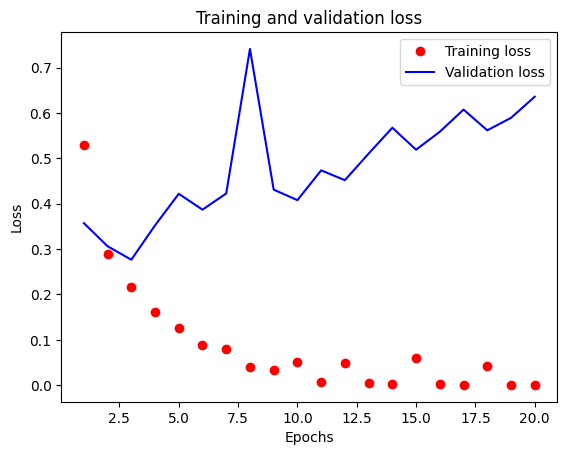

In [127]:
loss_values = hist_dict64["loss"]
val_loss_values = hist_dict64["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

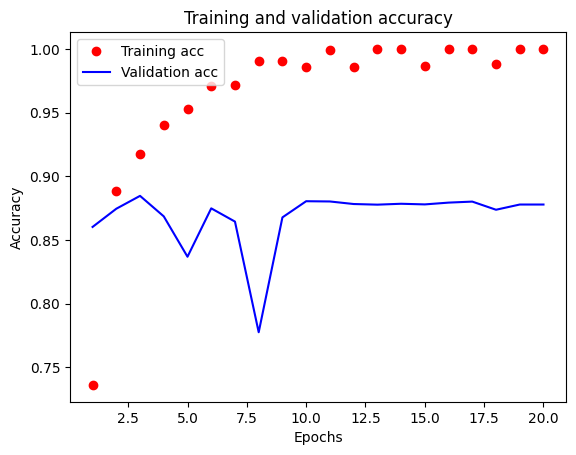

In [128]:
plt.clf()
acc = hist_dict64["accuracy"]
val_acc = hist_dict64["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [129]:
history_64 = model_64.fit(x_train, y_train, epochs=3, batch_size=525)
results_64 = model_64.evaluate(x_test, y_test)
results_64

Epoch 1/3
48/48 [==============================] - 0s 9ms/step - loss: 0.1833 - accuracy: 0.9458
Epoch 2/3
48/48 [==============================] - 0s 9ms/step - loss: 0.0875 - accuracy: 0.9711
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.4238 - accuracy: 0.8712


[0.42381522059440613, 0.8712000250816345]

In [130]:
model_64.predict(x_test)

782/782 [==============================] - 1s 2ms/step


array([[0.02735085],
       [1.        ],
       [0.8862462 ],
       ...,
       [0.01080568],
       [0.01272339],
       [0.96593916]], dtype=float32)

* The accuracy on the validation set is 87.12%

**MSE Loss Function**

In [131]:
np.random.seed(151)
model_MSE = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#Model compilation
model_MSE.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
# Model Fit
np.random.seed(151)
history_model_MSE = model_MSE.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 2s 27ms/step - loss: 0.1682 - accuracy: 0.7578 - val_loss: 0.1100 - val_accuracy: 0.8718
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0903 - accuracy: 0.8916 - val_loss: 0.0916 - val_accuracy: 0.8835
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0658 - accuracy: 0.9237 - val_loss: 0.0935 - val_accuracy: 0.8721
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0527 - accuracy: 0.9414 - val_loss: 0.0832 - val_accuracy: 0.8889
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0457 - accuracy: 0.9488 - val_loss: 0.0893 - val_accuracy: 0.8793
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0358 - accuracy: 0.9619 - val_loss: 0.0906 - val_accuracy: 0.8764
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0322 - accuracy: 0.9667 - val_loss: 0.1002 - val_accuracy: 0.8656
Epoch 8/20
29/29 [=

In [132]:
hist_dict_MSE = history_model_MSE.history
hist_dict_MSE.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

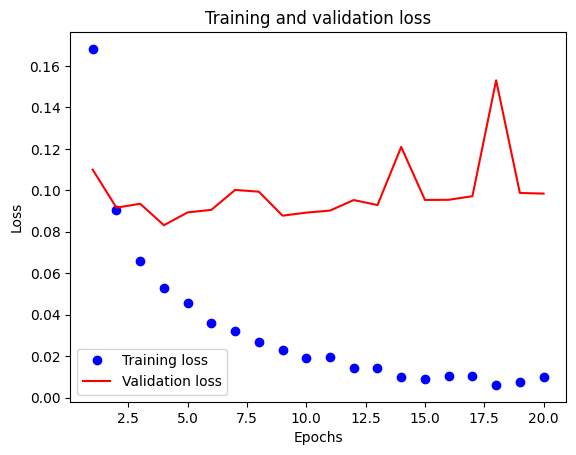

In [133]:
import matplotlib.pyplot as plt
loss_values = hist_dict_MSE["loss"]
val_loss_values = hist_dict_MSE["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

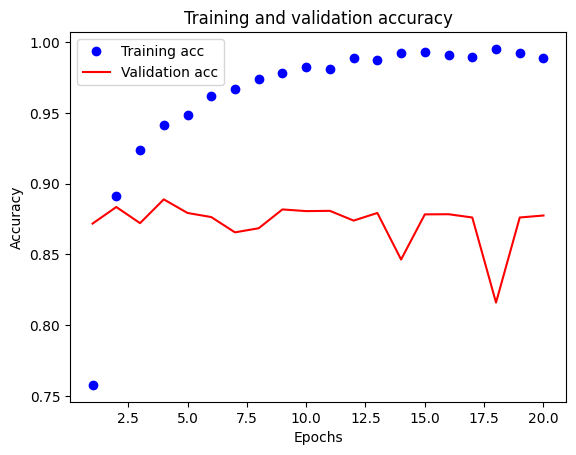

In [134]:
plt.clf()
acc = hist_dict_MSE["accuracy"]
val_acc = hist_dict_MSE["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [135]:
model_MSE.fit(x_train, y_train, epochs=8, batch_size=525)
results_MSE = model_MSE.evaluate(x_test, y_test)
results_MSE

Epoch 1/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0433 - accuracy: 0.9482
Epoch 2/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0332 - accuracy: 0.9623
Epoch 3/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0261 - accuracy: 0.9708
Epoch 4/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0225 - accuracy: 0.9763
Epoch 5/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0197 - accuracy: 0.9793
Epoch 6/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0179 - accuracy: 0.9818
Epoch 7/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0153 - accuracy: 0.9848
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.1079 - accuracy: 0.8679


[0.10791987925767899, 0.8679199814796448]

In [136]:
model_MSE.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.00888386],
       [0.99999994],
       [0.9346486 ],
       ...,
       [0.04037911],
       [0.00962277],
       [0.9049492 ]], dtype=float32)

**Tanh Activation Function**

In [137]:
np.random.seed(151)
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(151)

history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 3s 31ms/step - loss: 0.4753 - accuracy: 0.7795 - val_loss: 0.3441 - val_accuracy: 0.8663
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2704 - accuracy: 0.9021 - val_loss: 0.2942 - val_accuracy: 0.8791
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1965 - accuracy: 0.9308 - val_loss: 0.2761 - val_accuracy: 0.8850
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1547 - accuracy: 0.9450 - val_loss: 0.2890 - val_accuracy: 0.8820
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1180 - accuracy: 0.9598 - val_loss: 0.3083 - val_accuracy: 0.8811
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0966 - accuracy: 0.9679 - val_loss: 0.3443 - val_accuracy: 0.8737
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0795 - accuracy: 0.9741 - val_loss: 0.3834 - val_accuracy: 0.8746
Epoch 8/20
29/29 [=

In [138]:
hist_dict_tanh = history_tanh.history
hist_dict_tanh.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

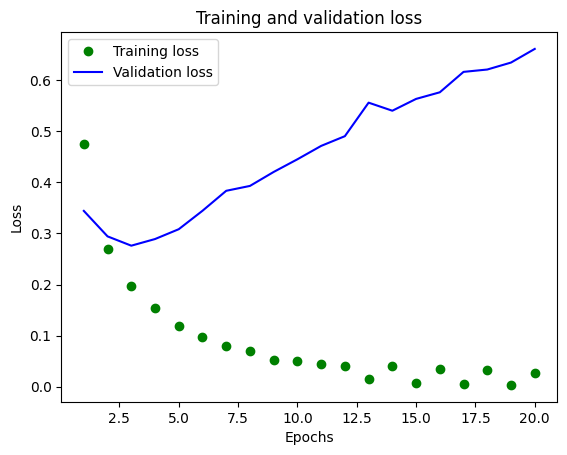

In [139]:
loss_values = hist_dict_tanh["loss"]
val_loss_values = hist_dict_tanh["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

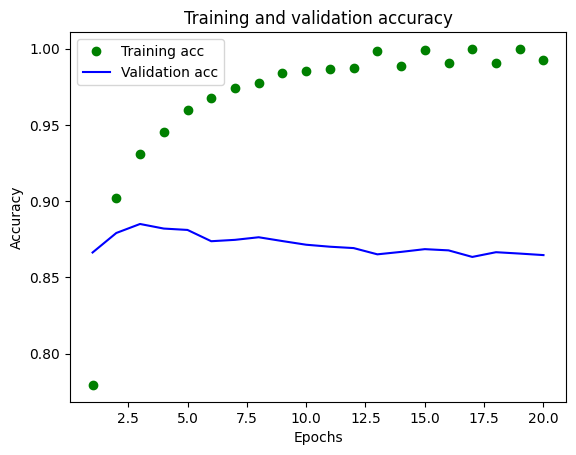

In [140]:
plt.clf()
acc = hist_dict_tanh["accuracy"]
val_acc = hist_dict_tanh["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [141]:
model_tanh.fit(x_train, y_train, epochs=8, batch_size=525)
results_tanh = model_tanh.evaluate(x_test, y_test)
results_tanh

Epoch 1/8
48/48 [==============================] - 0s 6ms/step - loss: 0.2124 - accuracy: 0.9456
Epoch 2/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1392 - accuracy: 0.9556
Epoch 3/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1105 - accuracy: 0.9629
Epoch 4/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0876 - accuracy: 0.9710
Epoch 5/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0762 - accuracy: 0.9752
Epoch 6/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0646 - accuracy: 0.9787
Epoch 7/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0537 - accuracy: 0.9831
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.5871 - accuracy: 0.8540


[0.5871069431304932, 0.8539599776268005]

**Adam Optimizer Function**

In [142]:

np.random.seed(151)
model_adam = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_adam.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

np.random.seed(151)

history_adam = model_adam.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))

Epoch 1/20
29/29 [==============================] - 2s 31ms/step - loss: 0.4884 - accuracy: 0.7734 - val_loss: 0.3212 - val_accuracy: 0.8714
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2212 - accuracy: 0.9205 - val_loss: 0.2834 - val_accuracy: 0.8844
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1436 - accuracy: 0.9525 - val_loss: 0.2941 - val_accuracy: 0.8838
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0996 - accuracy: 0.9721 - val_loss: 0.3240 - val_accuracy: 0.8808
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0709 - accuracy: 0.9826 - val_loss: 0.3519 - val_accuracy: 0.8802
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0477 - accuracy: 0.9914 - val_loss: 0.3914 - val_accuracy: 0.8748
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0332 - accuracy: 0.9957 - val_loss: 0.4280 - val_accuracy: 0.8724
Epoch 8/20
29/29 [=

In [143]:
hist_dict_adam = history_adam.history
hist_dict_adam.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

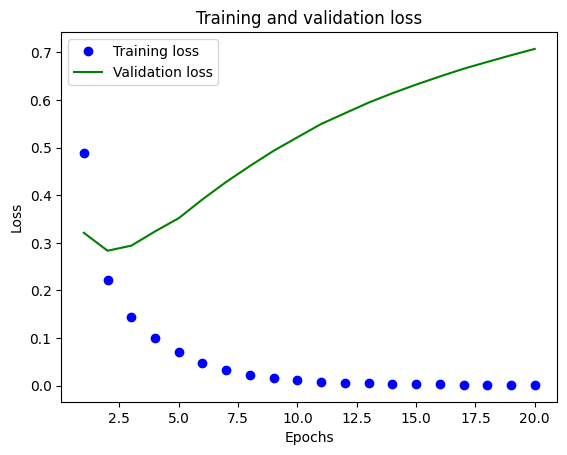

In [144]:
loss_values = hist_dict_adam["loss"]
val_loss_values = hist_dict_adam["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

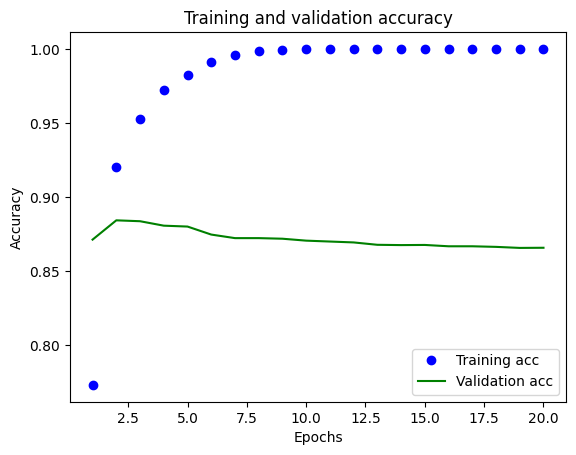

In [145]:
plt.clf()
acc = hist_dict_adam["accuracy"]
val_acc = hist_dict_adam["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [146]:
model_adam.fit(x_train, y_train, epochs=8, batch_size=525)
results_adam = model_adam.evaluate(x_test, y_test)
results_adam

Epoch 1/8
48/48 [==============================] - 0s 6ms/step - loss: 0.2416 - accuracy: 0.9298
Epoch 2/8
48/48 [==============================] - 0s 5ms/step - loss: 0.1116 - accuracy: 0.9628
Epoch 3/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0691 - accuracy: 0.9818
Epoch 4/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0467 - accuracy: 0.9892
Epoch 5/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0318 - accuracy: 0.9943
Epoch 6/8
48/48 [==============================] - 0s 5ms/step - loss: 0.0207 - accuracy: 0.9972
Epoch 7/8
48/48 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.9987
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.7068 - accuracy: 0.8551


[0.7067854404449463, 0.8551200032234192]

**Regularization**

In [147]:
from tensorflow.keras import regularizers
np.random.seed(151)
model_regularization = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
model_regularization.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(151)
history_model_regularization = model_regularization.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))
hist_dict_regularization = history_model_regularization.history
hist_dict_regularization.keys()

Epoch 1/20
29/29 [==============================] - 2s 31ms/step - loss: 0.5553 - accuracy: 0.7621 - val_loss: 0.4685 - val_accuracy: 0.8180
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.3487 - accuracy: 0.8929 - val_loss: 0.3451 - val_accuracy: 0.8857
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2686 - accuracy: 0.9255 - val_loss: 0.3456 - val_accuracy: 0.8802
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2333 - accuracy: 0.9365 - val_loss: 0.3266 - val_accuracy: 0.8884
Epoch 5/20
29/29 [==============================] - 0s 9ms/step - loss: 0.2116 - accuracy: 0.9445 - val_loss: 0.3460 - val_accuracy: 0.8833
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1882 - accuracy: 0.9557 - val_loss: 0.3421 - val_accuracy: 0.8840
Epoch 7/20
29/29 [==============================] - 0s 9ms/step - loss: 0.1768 - accuracy: 0.9601 - val_loss: 0.4279 - val_accuracy: 0.8583
Epoch 8/20
29/29 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

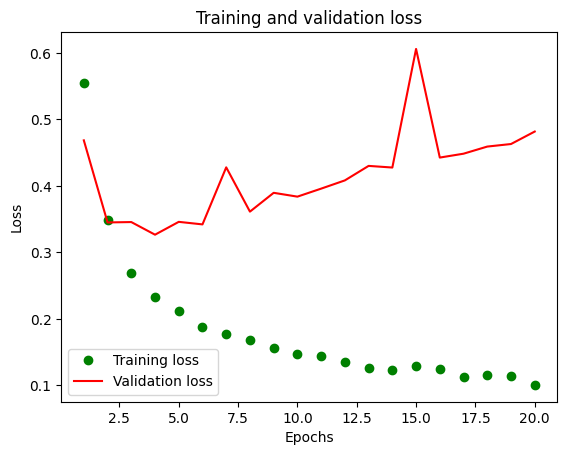

In [148]:
loss_values = hist_dict_regularization["loss"]
val_loss_values = hist_dict_regularization["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "go", label="Training loss")
plt.plot(epochs, val_loss_values, "r", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

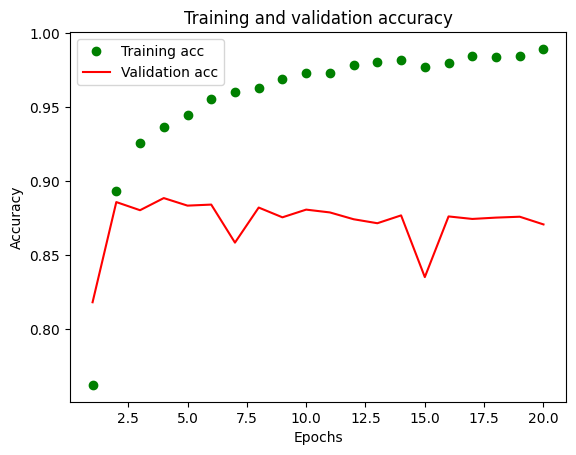

In [149]:
plt.clf()
acc = hist_dict_regularization["accuracy"]
val_acc = hist_dict_regularization["val_accuracy"]
plt.plot(epochs, acc, "go", label="Training acc")
plt.plot(epochs, val_acc, "r", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [150]:
model_regularization.fit(x_train, y_train, epochs=4, batch_size=525)
results_regularization = model_regularization.evaluate(x_test, y_test)
results_regularization

Epoch 1/4
48/48 [==============================] - 0s 6ms/step - loss: 0.2444 - accuracy: 0.9386
Epoch 2/4
48/48 [==============================] - 0s 6ms/step - loss: 0.1900 - accuracy: 0.9524
Epoch 3/4
48/48 [==============================] - 0s 6ms/step - loss: 0.1656 - accuracy: 0.9623
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.4355 - accuracy: 0.8667


[0.43545255064964294, 0.8666800260543823]

* The loss on test set is 0.4217 and accuracy is 86.92%.

**Dropout**

In [151]:

from tensorflow.keras import regularizers
np.random.seed(151)
model_Dropout = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Dropout.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
np.random.seed(151)
history_model_Dropout = model_Dropout.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))
hist_dict_Dropout = history_model_Dropout.history
hist_dict_Dropout.keys()

Epoch 1/20
29/29 [==============================] - 2s 30ms/step - loss: 0.6417 - accuracy: 0.6181 - val_loss: 0.5277 - val_accuracy: 0.8421
Epoch 2/20
29/29 [==============================] - 0s 9ms/step - loss: 0.5170 - accuracy: 0.7645 - val_loss: 0.4210 - val_accuracy: 0.8620
Epoch 3/20
29/29 [==============================] - 0s 9ms/step - loss: 0.4317 - accuracy: 0.8234 - val_loss: 0.3411 - val_accuracy: 0.8819
Epoch 4/20
29/29 [==============================] - 0s 9ms/step - loss: 0.3702 - accuracy: 0.8560 - val_loss: 0.3160 - val_accuracy: 0.8807
Epoch 5/20
29/29 [==============================] - 0s 8ms/step - loss: 0.3289 - accuracy: 0.8796 - val_loss: 0.2911 - val_accuracy: 0.8831
Epoch 6/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2924 - accuracy: 0.8957 - val_loss: 0.2821 - val_accuracy: 0.8878
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.2658 - accuracy: 0.9043 - val_loss: 0.2834 - val_accuracy: 0.8893
Epoch 8/20
29/29 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

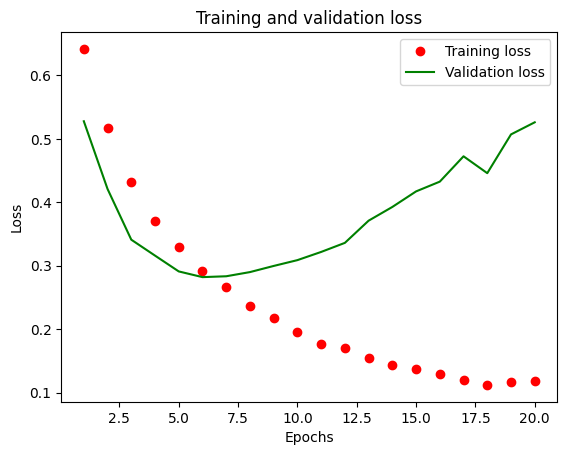

In [152]:
loss_values = hist_dict_Dropout["loss"]
val_loss_values = hist_dict_Dropout["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "ro", label="Training loss")
plt.plot(epochs, val_loss_values, "g", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

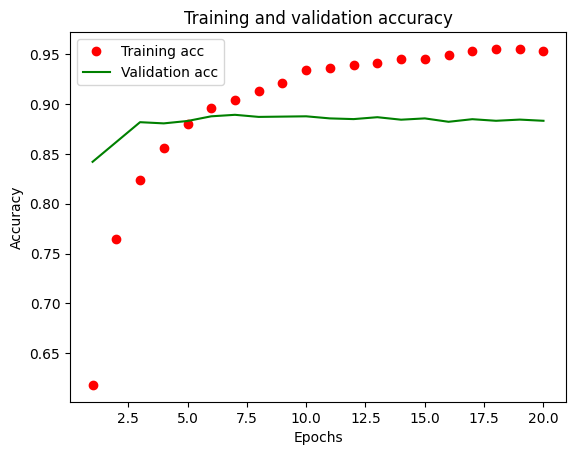

In [153]:
plt.clf()
acc = hist_dict_Dropout["accuracy"]
val_acc = hist_dict_Dropout["val_accuracy"]
plt.plot(epochs, acc, "ro", label="Training acc")
plt.plot(epochs, val_acc, "g", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [154]:
model_Dropout.fit(x_train, y_train, epochs=8, batch_size=525)
results_Dropout = model_Dropout.evaluate(x_test, y_test)
results_Dropout

Epoch 1/8
48/48 [==============================] - 0s 6ms/step - loss: 0.2810 - accuracy: 0.9066
Epoch 2/8
48/48 [==============================] - 0s 6ms/step - loss: 0.2419 - accuracy: 0.9150
Epoch 3/8
48/48 [==============================] - 0s 6ms/step - loss: 0.2143 - accuracy: 0.9207
Epoch 4/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1940 - accuracy: 0.9251
Epoch 5/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1784 - accuracy: 0.9325
Epoch 6/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1721 - accuracy: 0.9345
Epoch 7/8
48/48 [==============================] - 0s 6ms/step - loss: 0.1610 - accuracy: 0.9382
Epoch 8/8
782/782 [==============================] - 1s 1ms/step - loss: 0.4943 - accuracy: 0.8743


[0.49430418014526367, 0.8743199706077576]

* The loss on the test set is 0.4943% and accuracy is 0.8743%


**Training model with hyper tuned parameters**

In [155]:
from tensorflow.keras import regularizers
np.random.seed(151)
model_Hyper = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model_Hyper.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
np.random.seed(151)
history_model_Hyper = model_Hyper.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=525,
                    validation_data=(x_val, y_val))
hist_dict_Hyper = history_model_Hyper.history
hist_dict_Hyper.keys()

Epoch 1/20
29/29 [==============================] - 2s 32ms/step - loss: 0.2564 - accuracy: 0.5582 - val_loss: 0.2354 - val_accuracy: 0.7722
Epoch 2/20
29/29 [==============================] - 0s 10ms/step - loss: 0.2146 - accuracy: 0.7077 - val_loss: 0.1669 - val_accuracy: 0.8538
Epoch 3/20
29/29 [==============================] - 0s 10ms/step - loss: 0.1628 - accuracy: 0.8178 - val_loss: 0.1164 - val_accuracy: 0.8782
Epoch 4/20
29/29 [==============================] - 0s 10ms/step - loss: 0.1226 - accuracy: 0.8673 - val_loss: 0.0965 - val_accuracy: 0.8882
Epoch 5/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0998 - accuracy: 0.8951 - val_loss: 0.0974 - val_accuracy: 0.8865
Epoch 6/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0849 - accuracy: 0.9147 - val_loss: 0.1004 - val_accuracy: 0.8855
Epoch 7/20
29/29 [==============================] - 0s 10ms/step - loss: 0.0738 - accuracy: 0.9273 - val_loss: 0.0994 - val_accuracy: 0.8891
Epoch 8/20
29

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

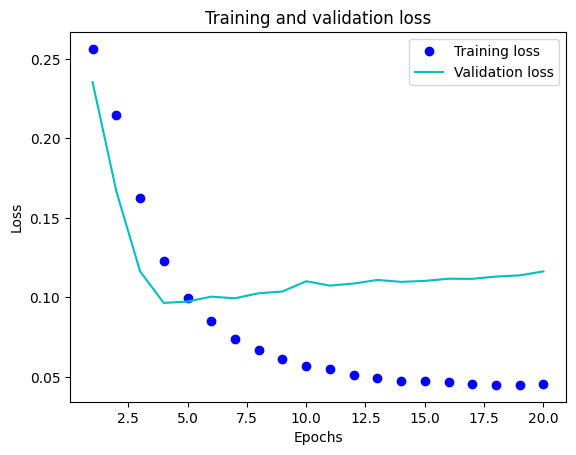

In [156]:
loss_values = hist_dict_Hyper["loss"]
val_loss_values = hist_dict_Hyper["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "c", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

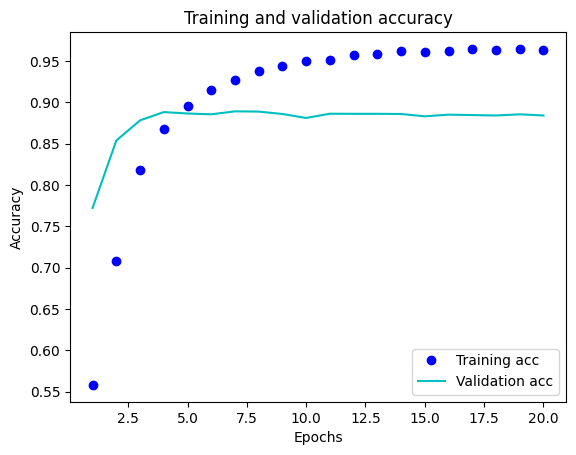

In [157]:
plt.clf()
acc = hist_dict_Hyper["accuracy"]
val_acc = hist_dict_Hyper["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "c", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [158]:
model_Hyper.fit(x_train, y_train, epochs=8, batch_size=525)
results_Hyper = model_Hyper.evaluate(x_test, y_test)
results_Hyper

Epoch 1/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0784 - accuracy: 0.9244
Epoch 2/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0737 - accuracy: 0.9298
Epoch 3/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0705 - accuracy: 0.9346
Epoch 4/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0652 - accuracy: 0.9418
Epoch 5/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0637 - accuracy: 0.9437
Epoch 6/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0612 - accuracy: 0.9479
Epoch 7/8
48/48 [==============================] - 0s 7ms/step - loss: 0.0583 - accuracy: 0.9522
Epoch 8/8
782/782 [==============================] - 1s 2ms/step - loss: 0.1182 - accuracy: 0.8774


[0.11816161125898361, 0.8773599863052368]

Summary

In [159]:
model_Loss= np.array([results_Dropout[0],results_Hyper[0],results_MSE[0],results_regularization[0],results_tanh[0]])*100
model_Loss
model_Accuracy= np.array([results_Dropout[1],results_Hyper[1],results_MSE[1],results_regularization[1],results_tanh[1]])*100
model_Accuracy
Labels=['Model_Dropout','Model_Hyper','Model_MSE','model_regularization','model_tanh']
plt.clf()

<Figure size 640x480 with 0 Axes>

Compilation

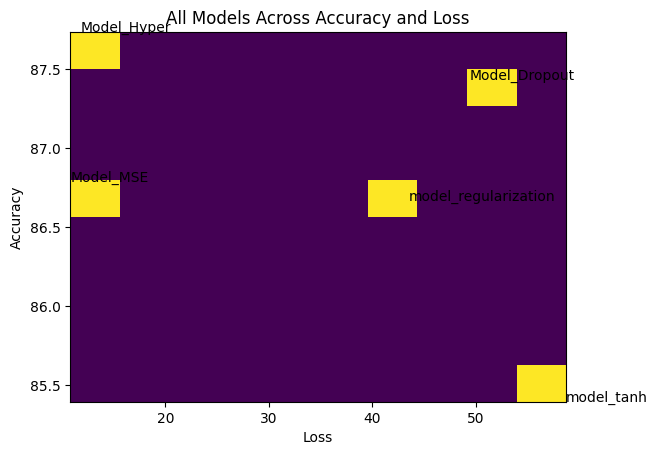

In [160]:
fig, ax = plt.subplots()
ax.hist2d(model_Loss,model_Accuracy)
for i, txt in enumerate(Labels):
    ax.annotate(txt, (model_Loss[i],model_Accuracy[i] ))
plt.title("All Models Across Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

**Summary**   

* After  freighting the data and setting the  ultimate number of words and review  extent, we constructed a baseline neural network model with a single  secluded layer comprising 16 units. The activation function for the  secluded layer was set to relu, andbinary_crossentropy was  exercised as the loss function.   
* To enhance the model's  interpretation, we experimented with  nonidentical approaches.  originally, we varied the number of  retired layers,  likening models with one and three  retired layers. Following training and evaluation on both the training and test datasets, we  set up that the three  retired layer model yielded  hardly advanced  confirmation and test  delicacy compared to the single  retired layer model.    
* Afterward , we explored the  jolt of  conforming the number of hidden units within the layers,  specially  utilizing 32 and 64 units. By training and  assessing models with varying  figures of hidden units and  conniving the  confirmation  delicacy for each, we observed that  adding  the number of hidden units  usually redounded in advanced  confirmation and test  delicacy.  still,  inordinate units could conduct to overfitting.   
* In  extension, we  researched the use of the mean squared  inaccuracy(mse) loss function  rather ofbinary_crossentropy. Through training and  assessing the model with mse loss and  likening the  effects with the baseline model, we  set up that the mse loss didn't significantly affect the model's  interpretation.   

**Conclusion**   

* In the final phase of our  trial, we  enforced dropout regularization to  alleviate overfitting. By incorporating dropout layers into a new model and conducting training and evaluation on the training and test datasets, we observed that the application of dropout regularization redounded in advanced  confirmation  delicacy  assimilated to the baseline model.   
* It's apparent that the  colorful duplications of the neural network models displayed differing  situations of  delicacy and loss. The"Model_Hyper" demonstrated the loftiest  delicacy and loss, indicating that employing three  packed layers with a dropout rate of0.5 can yield optimal  interpretation for the IMDB dataset.  likewise,  exercising the mean  coincided  inaccuracy(MSE) loss function led to the  smallest loss value  assimilated to  doublecross-entropy. Again, the tanh activation function displayed  lesser  delicacy due to the  evaporating  grade case.   
* The Adam optimizer function was  linked as effective for calculating the model.likewise, regularization  ways  substantiated  operative in reducing overfitting and performing in diminished losses, with the L2 model  strutting  hardly  bettered  delicacy. While the dropout technique  downgraded the loss function, it didn't  specially impact the  delicacy.esteeming the  vivid representation, it's apparent that the"Model_Hyper" exhibits the loftiest  delicacy with a  nicely low loss.
* On the other  phase, the"Model_MSE" demonstrated the  smallest loss value but didn't achieve the same  position of  delicacy as the"Model_Hyper." The"Model_tanh" displayed  lesser  delicacy  assimilated to other models, while the"model_regularization" showcased advanced loss and  lesser  delicacy in comparison to the other models.  
* Hence, grounded on the  complete evaluation of the models, it can be concluded that the"Model_Hyper" stands out as the best- performing model among those assessed.